In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

import pickle
pd.set_option('display.max_rows', 200)

In [80]:
churnData_df=pd.read_csv("C:\\Users\\User\\Downloads\\DATA_Customer-Churn.csv")#loading data
churnData_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
churnData_df.info()#checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
churnData_df['TotalCharges']=pd.to_numeric(churnData_df['TotalCharges'],errors='coerce') #converting data type from object to float

In [6]:
churnData_df['TotalCharges'].fillna(value=churnData_df['TotalCharges'].mean(), inplace=True)

In [7]:
churnData_df.isnull().sum() #checking for null values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
X=churnData_df[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']] #selecting features to be used
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [26]:
y=churnData_df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled)
X_scaled_df

### Logistic Regression Model(Classification)

,Error_metric,Train,Test
0,Accuracy,0.79,0.80
1,Precision,0.65,0.70
2,Recall,0.43,0.46


Confusion matrix for the train set
[[3800  343]
 [ 847  644]]


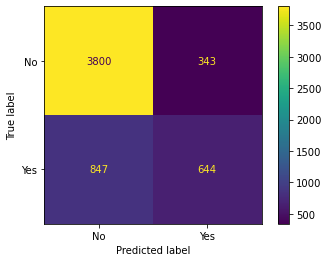



Confusion matrix for the test set
[[957  74]
 [206 172]]


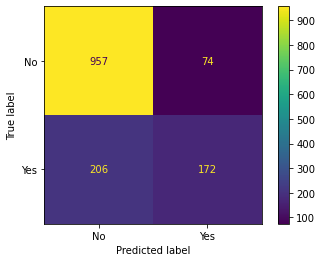

In [27]:
#Fit a logistic Regression model on the training data(and test data)
log_model = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)##Split the data into training set and test set

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN Classifier Model

In [50]:
#Fit a Knn Classifier model on the training data

model = KNeighborsClassifier(n_neighbors=3,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

,Error_metric,Train,Test
0,Accuracy,0.86,0.80
1,Precision,0.78,0.70
2,Recall,0.66,0.46


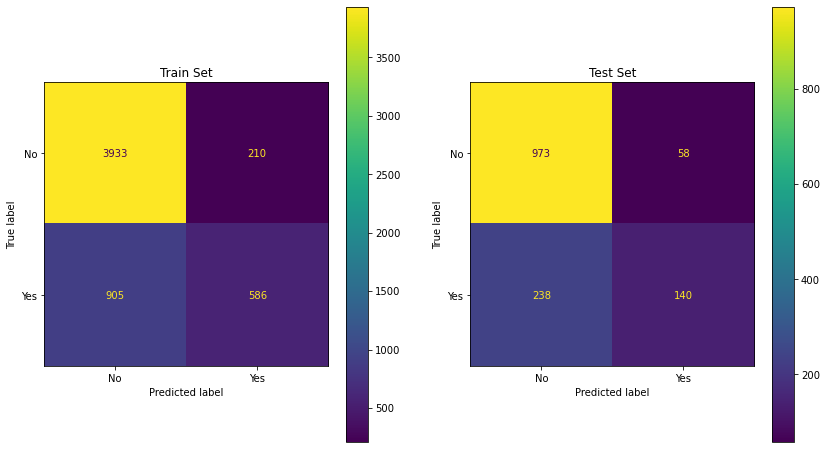

In [69]:
knn_performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                                'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label='Yes')]})
                                
                               
                               
display(knn_performance_df)   
fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")
#pd.options.display.float_format='{:.2f}'.format

#df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})

    




In [70]:
mo= KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7899219304471257

## Round 2-Decision Tree (Classifier)

,Error_metric,Train,Test
0,Accuracy,0.80,0.79
1,Precision,0.74,0.71
2,Recall,0.39,0.37


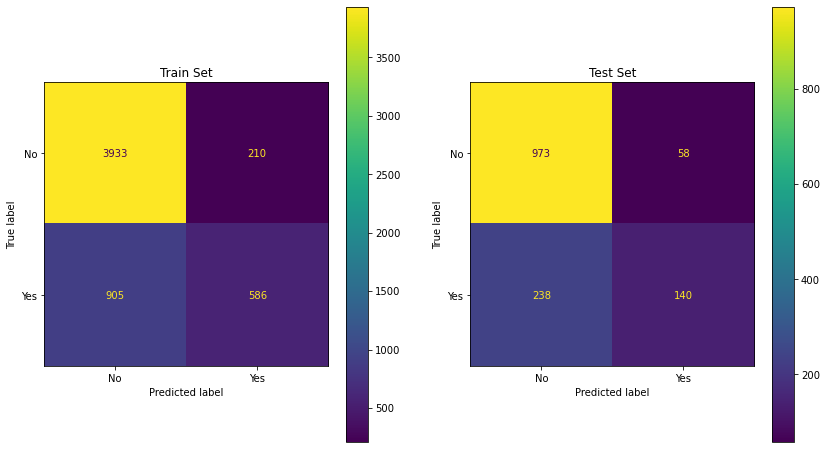

In [64]:
model = DecisionTreeClassifier(max_depth=6)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

dt_performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label='Yes')]})

display(dt_performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Features Importance

<BarContainer object of 4 artists>

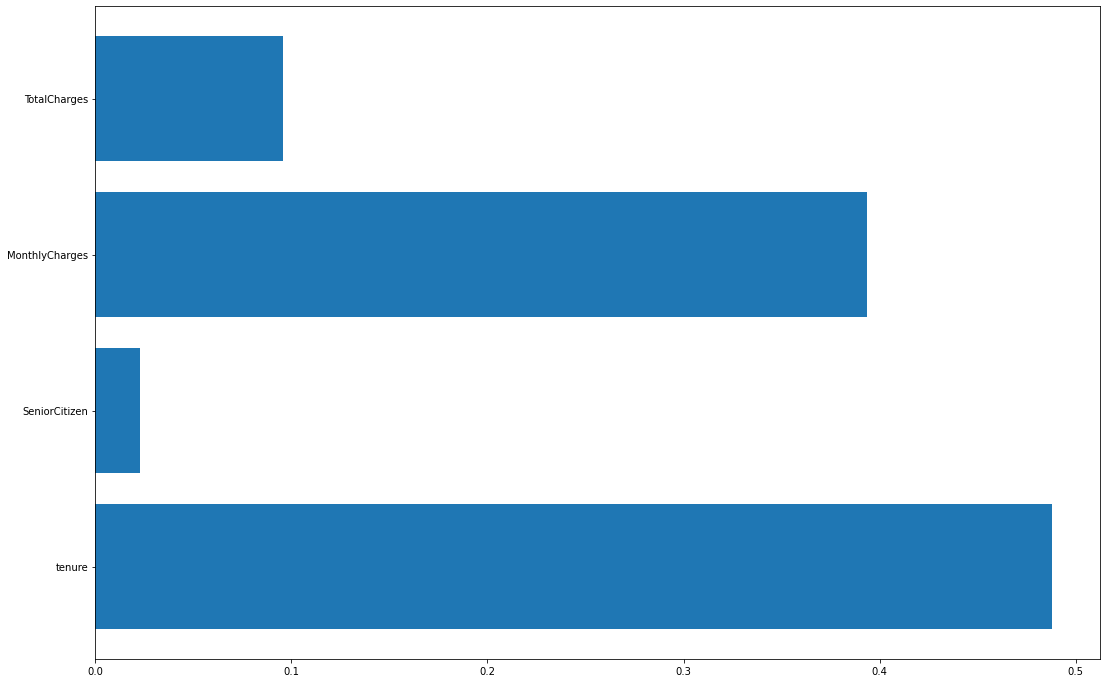

In [65]:
plt.figure(figsize=(18,12))
plt.barh(X.columns,model.feature_importances_)

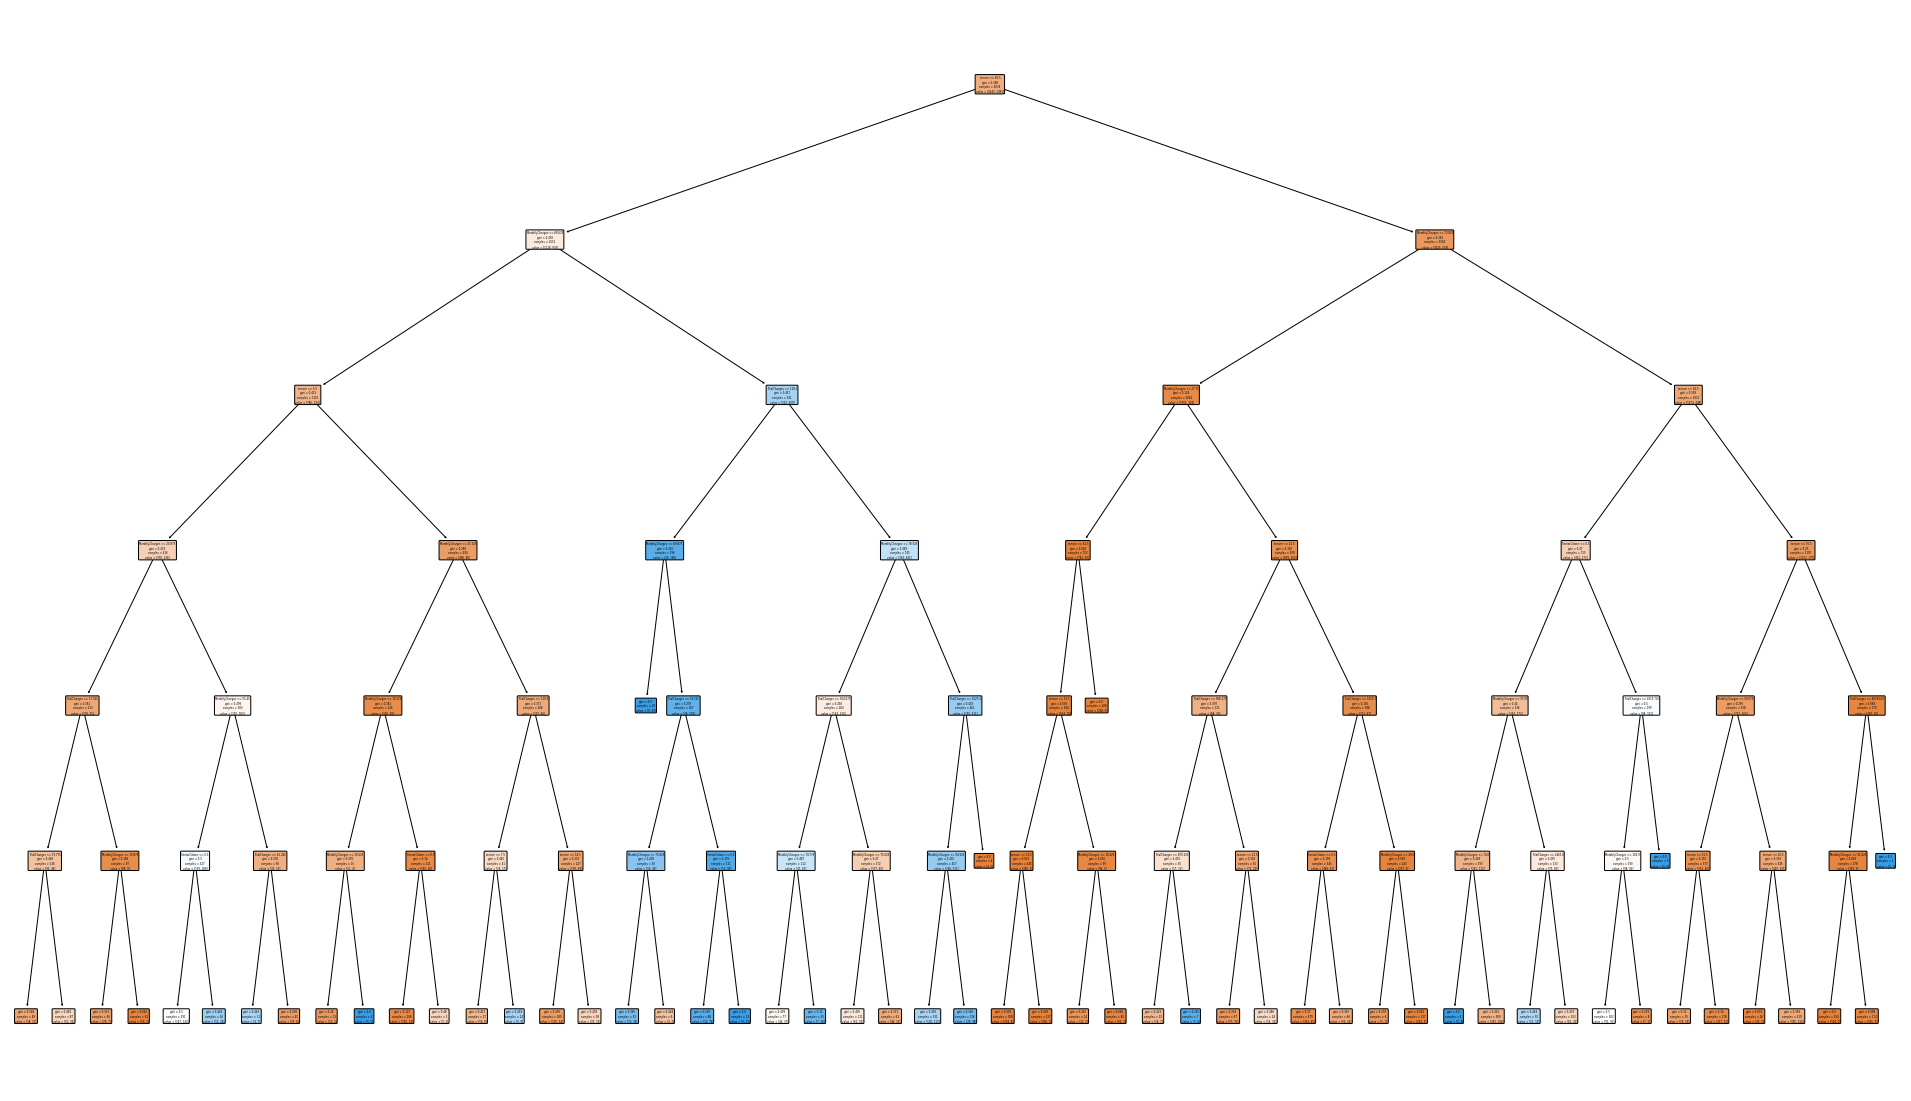

In [66]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

### K-Fold Cross Validation

In [67]:
mo= DecisionTreeClassifier()  ##checking Model score
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7899219304471257

In [73]:
model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Classifier', 'Logistic Classifier', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree Classifier': 0.7270161906758225, 'Logistic Classifier': 0.7905580921070258, 'KNN Classifier': 0.767304543255251}


### Managing imbalance in the dataset


In [84]:
churnData=pd.read_csv("C:\\Users\\User\\Downloads\\DATA_Customer-Churn.csv")
churnData.describe() ##checking the imbalance in the dataset

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [76]:
5174/len(churnData_df['Churn'])

0.7346301292063041

In [89]:
Target_df=pd.DataFrame(y)
Target_df

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [90]:
##Downsampling

category_0 = churnData_df[churnData_df['Churn'] == 'No']
category_1 = churnData_df[churnData_df['Churn']  =='Yes']

In [91]:
print(category_0.shape)
print(category_1.shape)

(5174, 16)
(1869, 16)


In [92]:
category_0_down = category_0.sample(len(category_1,))
print(category_0_down.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [95]:
churnData_df = pd.concat([category_0_down, category_1], axis=0)


In [96]:
churnData_df = churnData_df.sample(frac=1)  #reshuffling the data
churnData_df['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [99]:
##Upsampling using Smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [100]:
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

Churn
No       5174
Yes      5174
dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Train shape--->', X_train.shape, 'Test shape--->', X_test.shape)

Train shape---> (4718, 4) Test shape---> (2325, 4)


## Round 4

### Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

C:\Users\User\AppData\Local\Temp/ipykernel_11816/268815629.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.874311148791861
0.7879569892473118


In [105]:
##cross validating scores

clf = RandomForestClassifier(max_depth=10, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

array([0.78495763, 0.77118644, 0.77860169, 0.77730647, 0.78154825])

In [106]:
np.mean(cross_val_scores)

0.7787200963387674

In [ ]:
###tuning the hyper parameters with Gridsearch and checking the results
